In [31]:
source("/root/workspace/code/midas/preprocess/utils.R")
setwd("/root/workspace/code/midas/")

parser <- ArgumentParser()
# parser$add_argument("--task", type = "character", default = "dogma_single_rna_transfer")
# parser$add_argument("--method", type = "character", default = "midas_embed")
# parser$add_argument("--exp", type = "character", default = "e0")
# parser$add_argument("--model", type = "character", default = "default")
# parser$add_argument("--init_model", type = "character", default = "sp_00001999")

parser$add_argument("--task", type = "character", default = "bm_continual")
parser$add_argument("--method", type = "character", default = "midas_embed")
parser$add_argument("--exp", type = "character", default = "sample_ref")
parser$add_argument("--model", type = "character", default = "default")
parser$add_argument("--init_model", type = "character", default = "sp_00003899")
o <- parser$parse_known_args()[[1]]

In [32]:
# load labels
result_dir <- pj("result", "comparison", o$task, o$method, o$exp, o$model, o$init_model)
pred <- gsub(" cell.*", "", read.csv(pj(result_dir, "label_transferred.csv"), header = F)[, 1])
gt <- gsub(" cell.*", "", read.csv(pj(result_dir, "label_gt.csv"), header = F)[, 1])

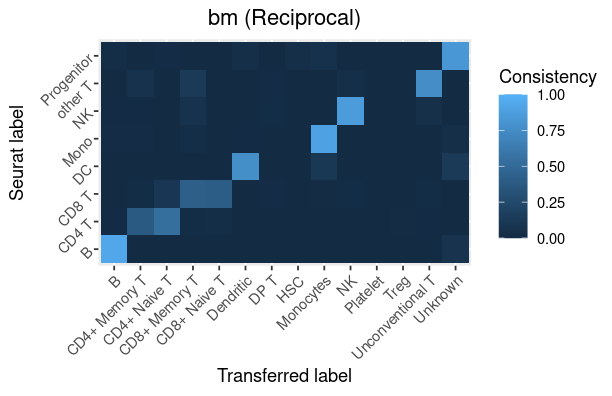

In [35]:
if (grepl("bm", o$task)) {
    w <- 5.1
    h <- 3.3
    keep_class <- F
    legend <- T
    y_lab <- "Seurat label"
    x_lab <- "Transferred label"
    image_dir <- "paper/6/label_transfer_confusion"
} else {
    w <- 4
    h <- 4.2
    keep_class <- T
    legend <- F
    y_lab <- "Atlas label"
    x_lab <- "Transferred label"
    image_dir <- "paper/5/label_transfer_confusion"
}
title_name <- rename_task_lt(o$task, o$init_model)

p <- cm_plot(pred, gt, keep_class, legend) + ggtitle(title_name) + theme(plot.title = element_text(hjust = 0.5)) +
     ylab(y_lab) + xlab(x_lab)
plt_size(w, h)
p

In [34]:
mkdir(image_dir, remove_old = F)
ggsave(plot = p, file = pj(image_dir, paste0(title_name, "_", o$init_model, "_confusion.png")), width = w, height = h, limitsize = F)
ggsave(plot = p, file = pj(image_dir, paste0(title_name, "_", o$init_model, "_confusion.pdf")), width = w, height = h, limitsize = F)